
Lambda School Data Science

*Build Week - unit-2,*   dated: 07/31/20

---

#Airbnb San Francosco Price Prediction


In [42]:
import pandas as pd
import numpy as np

In [43]:

abnb = pd.read_csv('Abnb_nbr.csv')

abnb.shape

C:\Users\anita\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.



(8680, 92)

In [44]:
abnb.isnull().sum()

ID               0
Listing Url      0
Scrape ID        0
Last Scraped     0
Name             0
                ..
Geolocation      0
Features         2
Population       0
Home_Value       0
Median_Income    0
Length: 92, dtype: int64

In [45]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()

    # Customise columns: Replace white space with underscore
    X.columns = X.columns.str.replace(' ', '_')  

    # Extract any 'good' Nulls value before they're removed.

    # 1. For string: Replace the nulls with 'not_listed', and impute missing values later. !!!
    cols_NaNs1 = ['Amenities', 'Features', 'Host_Response_Time']
    for col in cols_NaNs1:
        X[col] = X[col].fillna('not_listed')


    # 2. For numbers: Replace the nulls with 0 (fillna(0)), and impute missing values later. !!!
    cols_NaNs2 = ['Security_Deposit', 'Cleaning_Fee', 'Reviews_per_Month' ]
    for col in cols_NaNs2:
        X[col] = X[col].fillna(0)


    # Fillna for other columns with most frquent values. Definitely with 1 (one)
    cols3 = ['Bedrooms', 'Beds', 'Bathrooms']
    for col in cols3:
        X[col] = X[col].fillna(X[col].mode()[0])


    # Drop duplicates
    X = X.drop(columns=['Neighbourhood', 'Neighbourhood_Group_Cleansed'], axis=1)


    # Edit some string on Zipcode
    X['Zipcode'] = X['Zipcode'].str.replace('-1273', '' ).str.replace(' 94158', '').astype(str)
    X['Zipcode'] = X['Zipcode'].str.replace('94401', '94114').astype(str)

    # return the wrangled dataframe
    return X

abnb = wrangle(abnb)

In [46]:
# Rename dataframe from now on.

df = abnb.rename(columns={'Neighbourhood_Cleansed': 'Neighbourhood'})
df.shape

(8680, 90)

In [47]:
# Feature Engineering based on column 'Amenities'
# Does the unit provide TV, Internet, Breakfast, Kitchen, Air conditioning, Heating, Washer, Dryer

def hasAmenity(amenity):
  def hasItem(x):
    # print(x)
    if amenity in x:
      return 1
    else:
      return 0
  return hasItem


In [48]:
df['FreeParking'] = df['Amenities'].apply(hasAmenity("Free parking"))
df['TV'] = df['Amenities'].apply(hasAmenity("TV"))
df['Internet'] = df['Amenities'].apply(hasAmenity("Internet"))
df['Breakfast'] = df['Amenities'].apply(hasAmenity("Breakfast"))
df['Kitchen'] = df['Amenities'].apply(hasAmenity("Kitchen"))
df['Heating'] = df['Amenities'].apply(hasAmenity("Heating"))
df['Washer'] = df['Amenities'].apply(hasAmenity("Washer"))
df['Gym'] = df['Amenities'].apply(hasAmenity("Gym"))
df['Essentials'] = df['Amenities'].apply(hasAmenity("Essentials"))
df['AirCon'] = df['Amenities'].apply(hasAmenity("Air conditioning"))
df['NonSmoking'] = df['Amenities'].apply(hasAmenity("No smoking"))
df['Pool'] = df['Amenities'].apply(hasAmenity("Pool"))


In [49]:
df.head(3)

ID                            Listing_Url     Scrape_ID Last_Scraped  \
0  16603222  https://www.airbnb.com/rooms/16603222  2.020000e+13     4/2/2017   
1   8291604   https://www.airbnb.com/rooms/8291604  2.020000e+13     4/2/2017   
2  15954036  https://www.airbnb.com/rooms/15954036  2.020000e+13     4/2/2017   

                                              Name  \
0  2 Bd+loft bed in HOT Victorian Mission district   
1                 Large, simple, and sunny SF room   
2               Colorful apartment with back patio   

                                             Summary  \
0  Grand Victorian home in the heart of SF Missio...   
1                                                NaN   
2  My place is close to everything you'll need to...   

                                               Space  \
0  Welcome to the Heart of San Francisco's Missio...   
1  The room is no-frills - a queen bed, a dresser...   
2                                                NaN   

                                         Description Experiences_Offered  \
0  Grand Victorian home in the heart of SF Missio...                none   
1  The room is no-frills - a queen bed, a dresser...                none   
2  My place is close to everything you'll need to...                none   

                               Neighborhood_Overview  ... Internet Breakfast  \
0  Follow this link to see 5 star reviews of my h...  ...        1         1   
1                                                NaN  ...        1         0   
2                                                NaN  ...        1         0   

  Kitchen Heating Washer Gym Essentials AirCon NonSmoking  Pool  
0       1       1      0   0          1      0          0     0  
1       1       1      0   0          1      0          0     0  
2       1       1      1   0          1      0          0     0  

[3 rows x 102 columns]

In [50]:
df.select_dtypes(include='number').nunique().sort_values()
df.select_dtypes(exclude='number').nunique().sort_values()
# df.dtypes

Last_Scraped                1
Jurisdiction_Names          1
State                       1
Experiences_Offered         1
City                        1
Country                     2
Country_Code                2
Calendar_last_Scraped       2
Smart_Location              3
Room_Type                   3
Market                      5
Host_Response_Time          5
Bed_Type                    5
Cancellation_Policy         5
Property_Type              24
Zipcode                    28
Neighbourhood              37
Features                   50
Calendar_Updated           56
Host_Neighbourhood        155
Street                    202
Host_Verifications        268
Host_Location             312
Last_Review               760
License                   838
First_Review             1675
Host_Since               2325
Host_Name                2933
Notes                    3548
Host_About               4484
Neighborhood_Overview    4662
Interaction              4662
Access                   4865
Transit   

In [51]:
df['Price'].describe()

count    8484.000000
mean      204.700141
std       154.448638
min         0.000000
25%       100.000000
50%       155.000000
75%       250.000000
max       999.000000
Name: Price, dtype: float64

In [52]:
# Check Price percentile
low = .5
high = 99.5

print('Percentile of', low,' % price is ', np.percentile(df['Price'].dropna(),low, axis =0))
print('Percentile of',high,'% price is ', np.percentile(df['Price'].dropna(),high, axis =0))

Percentile of 0.5  % price is  34.0
Percentile of 99.5 % price is  900.0


In [53]:
# Make columns cleaner

# Make sure the target is clean
df = df.dropna(subset=['Price'])

####################################################################

# Limit the price: remove 0.
df =   df[(df['Price'].between(20,800))]# 

# Limit with only the data with notNull >6500
df = df.dropna(thresh=6500, axis=1)
######################################################################


# Get a dataframe with all train columns except unneeded columns
df_features = df.drop(columns=['ID', 'Scrape_ID', 'Host_ID', 'Latitude', 'Longitude'], axis=1) ## Without Lat/Long was done on 07/28
# df_features = df.drop(columns=['ID', 'Scrape_ID', 'Host_ID'], axis=1) ## Without Lat/Long was done on 07/28

# Get a list of the numeric features
numeric_features = df_features.select_dtypes(include='number').columns.tolist()

# Cardinality of the nonnumeric features
cardinality = df_features.select_dtypes(exclude='number').nunique()

# List of all categorical features with  (2< cardinality <70)
cat_features = cardinality[(cardinality <= 70) & (cardinality > 2) ].index.tolist()

# Combine the lists 
features = numeric_features + cat_features
# print(features)

In [54]:
train = df[features]

print(train.shape)
train.head(2)

(8399, 53)


Host_Listings_Count  Host_Total_Listings_Count  Accommodates  Bathrooms  \
0                  1.0                        1.0             4        1.0   
1                  1.0                        1.0             2        1.5   

   Bedrooms  Beds  Price  Security_Deposit  Cleaning_Fee  Guests_Included  \
0       2.0   3.0  175.0             300.0          75.0                4   
1       1.0   1.0   90.0             100.0           0.0                1   

   ...  Neighbourhood  Zipcode         Market     Smart_Location  \
0  ...        Mission    94110  San Francisco  San Francisco, CA   
1  ...        Mission    94110  San Francisco  San Francisco, CA   

   Property_Type        Room_Type  Bed_Type  Calendar_Updated  \
0      Apartment  Entire home/apt  Real Bed         yesterday   
1      Apartment     Private room  Real Bed     19 months ago   

   Cancellation_Policy                                           Features  
0               strict             Host Has Profile Pic,Is Location Exact  
1             flexible  Host Has Profile Pic,Host Identity Verified,Is...  

[2 rows x 53 columns]

##Visualisation with Plotly. <br>What is the average Airbnb renting price per night in SF?

In [55]:
# Import packages for cgarting

import plotly.figure_factory as ff
import numpy as np
import chart_studio
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt

chart_studio.tools.set_credentials_file(username='henrygultom', api_key='TCczP1KyN9o3BdysTcBk')


In [56]:
# Show the Room_type distribution

fig = px.histogram(df, x='Price', title= 'Price and Room_type Distributions', nbins=40, color='Room_Type', width=1000, height=400)
fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))
fig.update_layout(
    yaxis_title="Count",
    font=dict( family="Courier New, monospace", size=18))#, color="black")) # or color="RebeccaPurple"

fig.show()



# fig.write_html("histogram3.html")
# py.plot(fig, filename = 'price-roomtype', auto_open=True)

In [57]:
# Bedrooms in Neighborhood distribution

fig = px.histogram(df, x="Neighbourhood", title="Neighborhood and #Bedrooms Distributions" ,  nbins=40, color='Bedrooms', width=1000, height=500).update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))
fig.update_layout(
    yaxis_title="Count",
    font=dict( family="Courier New, monospace", size=18))#, color="black")) # or color="RebeccaPurple"

# plt.xlabel("Neighborhood", size=20);
# plt.ylabel("Count", size=20);
fig.show();



# fig.write_html("histogram3.html")
# py.plot(fig, filename = 'nbrhood-bedroom', auto_open=True)


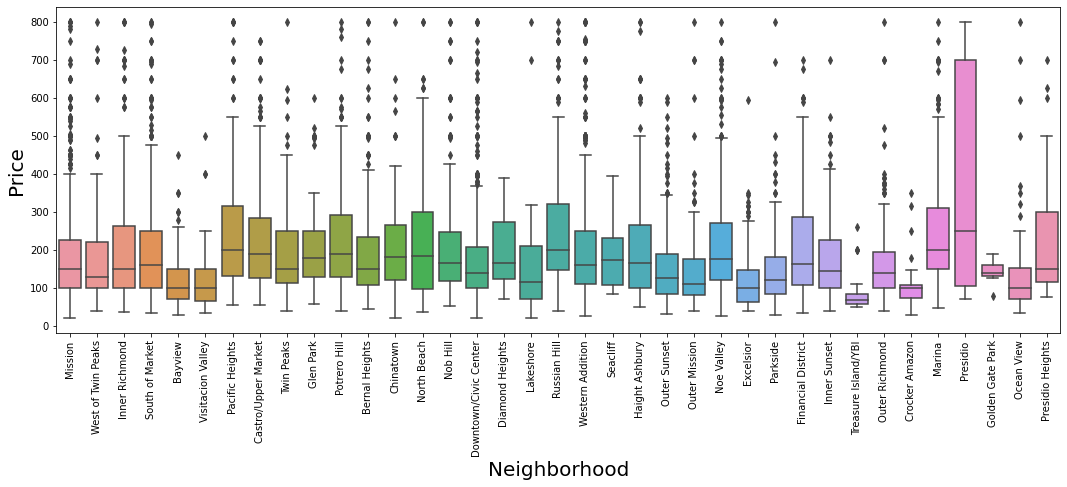

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["Neighbourhood"], y = df["Price"])#, palette="Blues");
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90);
plt.xlabel("Neighborhood", size=20)
plt.ylabel("Price", size=20)
plt.show();

In [59]:
# Pricec distribution across Neighborhood



fig = px.box(df, x="Neighbourhood", y="Price", title = 'Price Distribution Across Neighborhood')
fig.show()

# py.plot(fig, filename = 'nbrhood-price', auto_open=True)

In [60]:
# Number of people can be accommodated and price

fig = px.box(df, x="Accommodates", y="Price", title = 'Price Distributions over #Accommodated Guests')

fig.show()
# py.plot(fig, filename = 'accommodates-price', auto_open=True)

In [61]:
# Same graph with scatter plot

fig = px.scatter(df, x="Accommodates", y="Price", trendline='ols', width=1000, height=400)
fig.show()

ImportError: cannot import name 'factorial' from 'scipy.misc' (C:\Users\anita\Anaconda3\lib\site-packages\scipy\misc\__init__.py)

In [62]:
# Accommodates distribution

fig = px.histogram(df, x="Accommodates",  title="#Beds in 'Accommodates' Distribution" ,  nbins=40, color='Beds', width=1000, height=500) #.update_xaxes(categoryorder="total descending")

fig.update_layout(legend=dict( yanchor="top",  y=.95,  xanchor="right", x=.95 ))


# plt.xlabel("Neighborhood", size=20);
# plt.ylabel("Count", size=20);
fig.show();

# fig.write_html("histogram3.html")
# py.plot(fig, filename = 'accomodates-bedrm-count', auto_open=True)

###!!The above figure shows that the Accommodates-Price trend line is not linear when #Accommodates is above 10

In [63]:
# Property-Type and Price

fig = px.box(df, x="Property_Type", y="Price", title = 'Price Distribution over Property types', width=1000, height=400)

fig.show()
# py.plot(fig, filename = 'price-property_type', auto_open=True)

In [64]:
# Number Bedrooms and price

fig = px.box(df, x="Bedrooms", title = 'Price distributions for each #Bedrooms', y="Price",width=1000, height=400)

fig.show()
# py.plot(fig, filename = 'bedroom-price', auto_open=True)

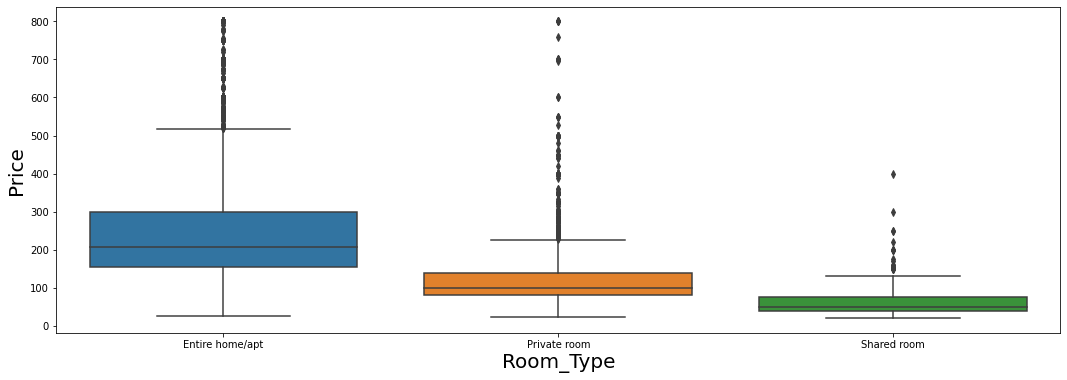

In [65]:
# Room type and Price


plt.figure(figsize=(18, 6))
chart2 = sns.boxplot(x = df["Room_Type"], y = df["Price"])#, palette="Blues");
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=0);
plt.xlabel("Room_Type", size=20)
plt.ylabel("Price", size=20)
plt.show()


##Airbnb San Francisco Mapping

In [66]:
# Mapping based on #Bedrooms

fig = px.scatter_mapbox(df,  title = "San Francisco Map", lat="Latitude", lon="Longitude", color=df['Neighbourhood'],  width=1000, height=700, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


fig.write_html("map3.html")
# py.plot(fig, filename = 'map3', auto_open=True)

In [67]:
# Define X & y

X_train = df[features].drop(columns='Price')
y_train = df['Price']

In [68]:
# Split into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [69]:
X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((6299, 52), (6299,), (2100, 52), (2100,))

#1 - Using Linear Regression

###1-1 Baseline

In [70]:
y_train.describe()

count    6299.000000
mean      199.321956
std       138.802248
min        20.000000
25%       100.000000
50%       155.000000
75%       250.000000
max       800.000000
Name: Price, dtype: float64

In [71]:
y_test.describe()

count    2100.000000
mean      195.141429
std       138.217153
min        22.000000
25%       100.000000
50%       150.000000
75%       250.000000
max       800.000000
Name: Price, dtype: float64

###The baseline shows :  
average price  = $199,  
with st_deviation of 138.  
This shows that the price distribution has a big spred


In [72]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Must put Standard Scaler . later on I need to take out some features based on coef_


In [73]:
# Fit the model
# linreg.fit(X_train, y_train)
# y_pred_lr = linreg.predict(X_test)

###Coefficients, intercept & metrics

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



#2 - Using RandomForestRegressor

In [75]:
import plotly.graph_objects as go


# py.plot(fig, filename = 'feature_imp2', auto_open=True)

#RandomForest Regressor to find the best parameters:

In [76]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from category_encoders import OneHotEncoder, OrdinalEncoder


#Try again RandomForestRegressor with another method, increase n_iter

In [77]:
# pd.DataFrame(search2.cv_results_).sort_values(by='rank_test_score').T

#3a - Using XGBRegressor with pipeline

In [78]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot
from xgboost import plot_importance

In [79]:
xgbreg1 = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=10, random_state=42, n_jobs=2, max_depth=4,  learning_rate=0.1)
)

xgbreg1.fit(X_train, y_train)

[19:14:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['Host_Response_Time', 'Neighbourhood', 'Zipcode', 'Market', 'Smart_Location', 'Property_Type', 'Room_Type', 'Bed_Type', 'Calendar_Updated', 'Cancellation_Policy', 'Features'],
        drop_invariant=False, handle_missing='value',
        handle_unknown=...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [80]:
# Make predictions on the test set
from sklearn.metrics import r2_score

y_pred_xg1 = xgbreg1.predict(X_test)

In [81]:
mse_xg1 = np.round(mean_squared_error(y_test, y_pred_xg1),3)
rmse_xg1 = np.round(np.sqrt(mse_xg1),3)
mae_xg1 = np.round(mean_absolute_error(y_test, y_pred_xg1),3)
r2_xg1 = np.round(r2_score(y_test, y_pred_xg1),3)

print('MAE   :', mae_xg1)
print('MSE   :', mse_xg1)
print('RMSE  :', rmse_xg1)
print('R^2 = :', r2_xg1)

MAE   : 77.957
MSE   : 15472.976
RMSE  : 124.39
R^2 = : 0.19


# 3b. Using XGBoostRegressor with Data Matrix  (MAE & RMSE only)
* https://www.datacamp.com/community/tutorials/xgboost-in-python  
* Only for MAE & *RMSE*

In [82]:
# This X_train_encoded value will be used for feature importance

encoder = ce.OrdinalEncoder()
imputer = SimpleImputer()
scaler = StandardScaler()

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [83]:
X_train_encoded
# X_train_encoded.isnull().sum()
# X_train_imputed

Host_Listings_Count  Host_Total_Listings_Count  Accommodates  Bathrooms  \
2140                  3.0                        3.0             3        1.0   
6999                  5.0                        5.0             2        1.0   
3068                  1.0                        1.0             2        1.0   
910                   1.0                        1.0             1        0.0   
5046                  1.0                        1.0             2        1.0   
...                   ...                        ...           ...        ...   
5925                  1.0                        1.0             2        1.0   
5362                  2.0                        2.0             1        1.0   
5571                  1.0                        1.0             2        1.0   
890                   1.0                        1.0             6        1.0   
7508                  1.0                        1.0             3        1.0   

      Bedrooms  Beds  Security_Deposit  Cleaning_Fee  Guests_Included  \
2140       0.0   1.0             100.0          25.0                1   
6999       1.0   1.0               0.0          30.0                1   
3068       1.0   1.0               0.0           0.0                1   
910        1.0   1.0               0.0           0.0                1   
5046       1.0   1.0               0.0          29.0                1   
...        ...   ...               ...           ...              ...   
5925       1.0   1.0             100.0          60.0                1   
5362       1.0   1.0               0.0           0.0                1   
5571       1.0   1.0             500.0          75.0                2   
890        2.0   2.0             500.0         150.0                1   
7508       1.0   1.0               0.0           0.0                1   

      Extra_People  ...  Neighbourhood  Zipcode  Market  Smart_Location  \
2140             5  ...              1        1       1               1   
6999             0  ...              2        2       1               1   
3068             0  ...              3        3       1               1   
910              0  ...              4        4       1               1   
5046             0  ...              3        5       1               1   
...            ...  ...            ...      ...     ...             ...   
5925             0  ...              7        1       1               1   
5362             0  ...             18        4       2               1   
5571            10  ...             10        9       1               1   
890              0  ...             24       19       1               1   
7508             0  ...              3        5       1               1   

      Property_Type  Room_Type  Bed_Type  Calendar_Updated  \
2140              1          1         1                 1   
6999              1          2         1                 2   
3068              1          1         1                 3   
910               2          2         1                 4   
5046              1          2         1                 5   
...             ...        ...       ...               ...   
5925              1          1         1                21   
5362              5          2         1                12   
5571              1          1         1                16   
890               2          1         1                 6   
7508              1          2         1                37   

      Cancellation_Policy  Features  
2140                    1         1  
6999                    2         2  
3068                    3         3  
910                     3         4  
5046                    1         4  
...                   ...       ...  
5925                    1         3  
5362                    3         4  
5571                    2         6  
890                     2         3  
7508                    3         3  

[6299 rows x 52 columns]

In [84]:
# convert the dataset into an optimized data structure called Dmatrix

data_dmatrix = xgb.DMatrix(data = X_train_encoded,label=y_train) ## this is called d_train, not d_test

dtest = xgb.DMatrix(X_test_encoded, label=y_test)

In [85]:
X_test_encoded.shape

(2100, 52)

In [86]:
X_train_encoded.shape, y_train.shape

((6299, 52), (6299,))

In [87]:
# K-fold X-validation. 


k=5
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10}

# This cv_results contains train and test RMSE metrics for each boosting round

cv_results_mae = xgb.cv(dtrain=data_dmatrix, params=params, nfold=k,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=123)

cv_results_rmse = xgb.cv(dtrain=data_dmatrix, params=params, nfold=k,
                    num_boost_round=50,early_stopping_rounds=10,metrics='rmse'  , as_pandas=True, seed=123)      

# cv_results_rmse = xgb.cv(dtrain=data_dmatrix, params=params, nfold=k,
#                     num_boost_round=50,early_stopping_rounds=10,metrics='error'  , as_pandas=True, seed=123)      


# We can also use - metric=list() -  meaning:  use all possible metrics
cv_results_list = xgb.cv(dtrain=data_dmatrix, params=params, nfold=k,
                    num_boost_round=50,early_stopping_rounds=10,metrics=list()  , as_pandas=True, seed=123)      



In [88]:
# cv_results_mae.tail()
# cv_results_rmse.tail()
cv_results_list.tail()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
45        34.812991        0.426836       87.112347       4.124954
46        34.213104        0.422570       87.061324       4.124750
47        33.656663        0.434961       87.023387       4.130032
48        33.175953        0.445288       86.981232       4.077193
49        32.700093        0.539835       86.973431       4.084923

In [89]:
# Final RMSE: get the lowest train-RMSE value

print(cv_results_mae.tail(1))
print()
print(cv_results_rmse.tail(1))

    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
49       20.234738        0.32879       54.98092      2.146983

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
49        32.700093        0.539835       86.973431       4.084923


#3c. Using XGBoostRegressor without pipeline

In [90]:
xg2 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 70)

In [91]:
xg2.fit(X_train_encoded,y_train)

[19:15:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=70,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [92]:
y_pred_xg2 = xg2.predict(X_test_encoded)

In [93]:
mse_xg2 = np.round(mean_squared_error(y_test, y_pred_xg2),3)
rmse_xg2 = np.round(np.sqrt(mse_xg2),3)
mae_xg2 = np.round(mean_absolute_error(y_test, y_pred_xg2),3)
r2_xg2 =  np.round(r2_score(y_test, y_pred_xg2),3)

print('MAE   :', mae_xg2)
print('MSE   :', mse_xg2)
print('RMSE  :', rmse_xg2)
print('R^2 = :', r2_xg2)

MAE   : 54.511
MSE   : 7473.189
RMSE  : 86.448
R^2 = : 0.609


##Visualize Boosting Trees and Feature Importance with XGB

In [94]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

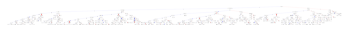

<Figure size 1440x1440 with 0 Axes>

In [95]:
# Plot the 1st tree

xgb.plot_tree(xg_reg,num_trees=1)
# plt.rcParams['figure.figsize'] = [70, 70]
plt.figure(figsize=(20,20));
plt.show()


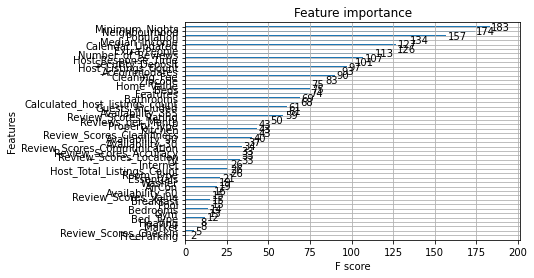

In [96]:
# XGBoost has a plot_importance() function . easy.

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 10]
plt.show();

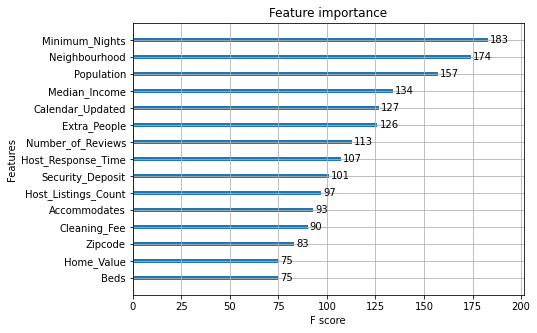

In [104]:
# XGBoost has a plot_importance() function . easy.

ax3 = xgb.plot_importance(xg_reg, max_num_features=15)
fig = ax3.figure
fig.set_size_inches(7,5);


#Trying to get XGB Hyper Parameter  
### https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/


In [105]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder


# encoder = LabelEncoder()
encoder = OrdinalEncoder()

X_train_xg4 = encoder.fit_transform(X_train)
X_test_xg4 = encoder.fit_transform(X_test)
# y_test_xg4 = encoder.fit_transform(y_test)

xgb4 = XGBRegressor()


param_distributions = {
        'max_depth': (3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
        'min_child_weight': np.arange(0.0001, 0.5, 0.001),
        'gamma': np.arange(0.0,40.0,0.005),
        'learning_rate': np.arange(0.0005,0.3,0.0005),
        'subsample': np.arange(0.01,1.0,0.01),
        'colsample_bylevel': np.round(np.arange(0.1,1.0,0.01)),
        'colsample_bytree': np.arange(0.1,1.0,0.01),
}

search4 = RandomizedSearchCV(
    xgb4, 
    param_distributions=param_distributions, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

In [106]:
xgb4.fit(X_train_xg4, y_train) ## without optim

[19:16:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [112]:
search4.fit(X_train_xg4, y_train)

OverflowError: Python int too large to convert to C long

In [113]:
y_pred_xg4 = search4.predict(X_test_xg4)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
optim_result = search4.fit(X_train_xg4, y_train)

# summarize results
print("Best: %f using %s" % (optim_result.best_score_, optim_result.best_params_))
means = optim_result.cv_results_[ 'mean_test_score' ]
stds = optim_result.cv_results_[ 'std_test_score' ]
params = optim_result.cv_results_[ 'params' ]


In [ ]:
# params

In [102]:
# Merics

mse_xg4 = np.round(mean_squared_error(y_test, y_pred_xg4),3)
rmse_xg4 = np.round(np.sqrt(mse_xg4),3)
mae_xg4 = np.round(mean_absolute_error(y_test, y_pred_xg4),3)
r2_xg4 =  np.round(r2_score(y_test, y_pred_xg4),3)

print('MAE   :', mae_xg4)
print('MSE   :', mse_xg4)
print('RMSE  :', rmse_xg4)
print('R^2 = :', r2_xg4)

NameError: name 'y_pred_xg4' is not defined

In [ ]:
# Compare with the TRAINING metric

print('Training MAE:', mean_absolute_error(y_train, search4.predict(X_train_xg4)))

Training MAE: 40.2706251109587


In [ ]:
# XGB feature_importances_
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/


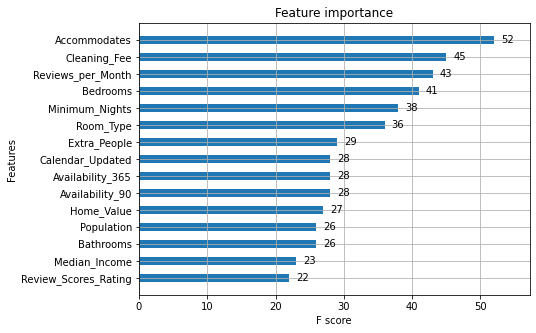

In [ ]:
# PLOTTING, can be done in many ways:

# plot_importance(xgb4, max_num_features=15, height=0.5)#, xlim=(0,10), ylim=(0,10))
# # fig.set_size_inches(4,2);
# pyplot.show()

# or

ax4 = plot_importance(xgb4, max_num_features=15, height=0.5)#, 
fig  = ax4.figure
fig.set_size_inches(7,5);

# or 

# ax4 = xgb.plot_importance(xgb4, max_num_features=15)
# fig = ax4.figure
# fig.set_size_inches(7,5);

In [ ]:
# search4.feature_importances_

#Which model is the best?  
The best ML model in this dataset is: lowest MAE and biggest R2

In [ ]:
# Create dataframe out of all metrics

Model = ['LinearRegression', 'RFRegression_1', 'RFRegression_2', 'RFRegression_3', 'XGB_1',  'XGB_2' , 'XGB_3']
MAE = [mae_lr, mae_rfr1, mae_rfr2, mae_rfr3, mae_xg1, mae_xg2, mae_xg4]
MSE = [mse_lr, mse_rfr1, mse_rfr2, mse_rfr3, mse_xg1, mse_xg2, mse_xg4]
RMSE = [rmse_lr, rmse_rfr1, rmse_rfr2, rmse_rfr3, rmse_xg1, rmse_xg2, rmse_xg4]
R2 = [r2_lr, r2_rfr1, r2_rfr2, r2_rfr3, r2_xg1, r2_xg2, r2_xg4]
Parameter = ['static', 'static', 'static', 'optimized', 'static', 'static', 'opimized' ]

cols = {'Model':Model, 'MAE':MAE ,  'MSE': MSE,  'RMSE': RMSE, 'R2': R2, 'Parameter': Parameter}

metric1 = pd.DataFrame(cols)
# metric1 = pd.DataFrame(cols, index = ['LinearRegression', 'RFRegression', 'RFRegression_best', 'XGB'])

metric1

Model     MAE        MSE     RMSE     R2  Parameter
0  LinearRegression  64.891   9924.065   99.620  0.480     static
1    RFRegression_1  62.423   9478.262   97.356  0.504     static
2    RFRegression_2  54.835   7365.461   85.822  0.614     static
3    RFRegression_3  54.452   7151.289   84.565  0.625  optimized
4             XGB_1  77.957  15472.976  124.390  0.190     static
5             XGB_2  54.511   7473.189   86.448  0.609     static
6             XGB_3  53.473   7283.174   85.342  0.619   opimized

In [ ]:
Best_model = metric1.tail(1)
Best_model

Model     MAE       MSE    RMSE     R2 Parameter
6  XGB_3  53.473  7283.174  85.342  0.619  opimized

#PDP-Plot

In [ ]:
plt.rcParams['figure.dpi'] = 72

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature_xgbr = 'Accommodates'

isolated = pdp_isolate(
    model=xgbreg1,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature_xgbr
)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7faa58f3df98>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7faa653b3470>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


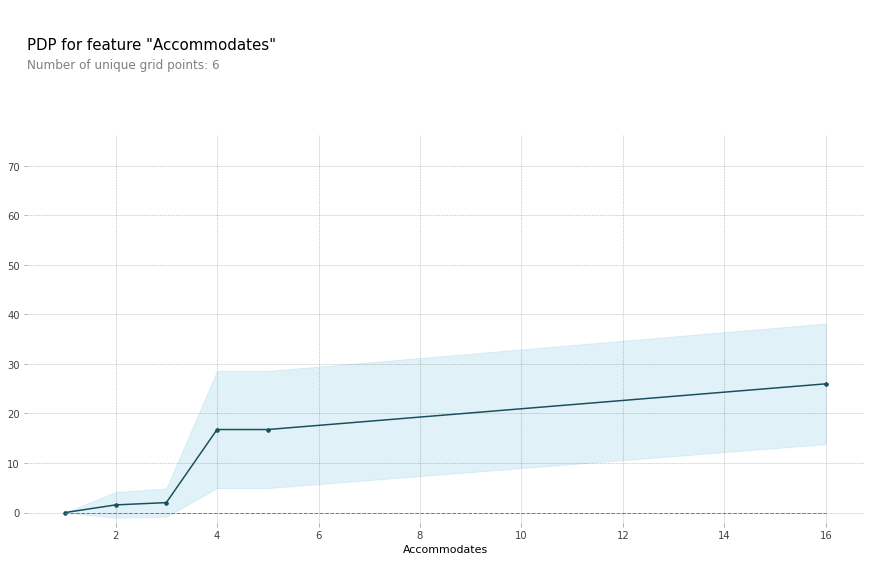

In [ ]:
pdp_plot(isolated, feature_name=feature_xgbr)

##PDP-Plot with 2 features


In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features2a = ['Bedrooms', 'Accommodates']

interaction = pdp_interact(
    model=xgbreg1,
    dataset=X_test,
    model_features=X_test.columns,
    features=features2a
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


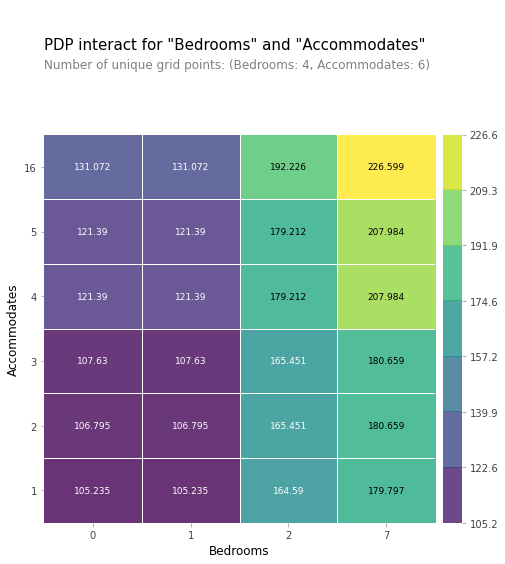

In [ ]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features2a);

#Shapley Value

In [ ]:
# Let's limit the features into:

feature_sh = ['Accommodates',  'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning_Fee', 'Reviews_per_Month'] 

In [ ]:
# Define X & y

X_train = df[feature_sh]
y_train = df['Price']

In [ ]:
# Split into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((6719, 6), (6719,), (1680, 6), (1680,))

In [ ]:
# I want to compare between xgbreg1 & xgbreg2.  Pipeline and non-pipeline

xgbreg1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=2, max_depth=4,  learning_rate=0.1)
)


xgbreg1.fit(X_train, y_train)

[01:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster=...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=4, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=2,
                              nthread=None, objective=

In [ ]:
# encoder = ce.OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_test_encoded = encoder.transform(X_test)

xgbreg2 = XGBRegressor(n_estimators=100, 
                       random_state=42, 
                       n_jobs=2, 
                       max_depth=4,  
                       learning_rate=0.1)

xgbreg2.fit(X_train, y_train)

[01:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=2, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
X_train.isnull().sum()

Accommodates         0
Bathrooms            0
Bedrooms             0
Beds                 0
Cleaning_Fee         0
Reviews_per_Month    0
dtype: int64

In [ ]:
# Show particular features 

row = X_test.iloc[[1]]
row

Accommodates  Bathrooms  Bedrooms  Beds  Cleaning_Fee  Reviews_per_Month
5456             6        1.0       2.0   3.0          90.0                3.0

In [ ]:
# What was the actual rent for this rbnb?
y_test.iloc[[1]]

5456    290.0
Name: Price, dtype: float64

In [ ]:
# What does the model predict for this airbnb?
xgbreg2.predict(row)

array([224.09393], dtype=float32)

In [ ]:
import shap 

explainer = shap.TreeExplainer(xgbreg2)
shap_values = explainer.shap_values(row)

# load JS visualization code to notebook
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

###Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue 

##Using the predict function

In [ ]:
def predict(Accommodates, Bathrooms, Bedrooms, Beds, Cleaning_Fee, Reviews_per_Month):

    # Make dataframe from the inputs
    dshap = pd.DataFrame(
        data=[[Accommodates, Bathrooms, Bedrooms, Beds, Cleaning_Fee, Reviews_per_Month]], 
        columns=['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning_Fee', 'Reviews_per_Month']
    )



    # Get the model's prediction
    pred = xgbreg2.predict(dshap)[0]

    # Calculate shap values
    explainer = shap.TreeExplainer(xgbreg2)
    shap_values = explainer.shap_values(dshap)

    # Get series with shap values, feature names, & feature values
    feature_names = dshap.columns
    feature_values = dshap.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # Print results
    result = f'${pred:,.0f} estimated rent for this SF_airbnb. \n\n'
    #result += f'Starting from baseline of ${explainer.expected_value:,.0f} \n'
    result += shaps.to_string()
    print(result)


    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=dshap
    )



In [ ]:
# features: Accommodates, Bathrooms, Bedrooms, Beds, Cleaning_Fee, Reviews_per_Month
predict(6, 1, 2, 2, 30, 5)

$192 estimated rent for this SF_airbnb. 

(Accommodates, 6)         40.724091
(Bathrooms, 1)           -22.209236
(Bedrooms, 2)             46.629822
(Beds, 2)                  3.192894
(Cleaning_Fee, 30)       -29.486845
(Reviews_per_Month, 5)   -45.914082


In [ ]:
# Accommodates, Bathrooms, Bedrooms, Beds, Cleaning_Fee, Reviews_per_Month
predict(5, 2, 1, 1, 0, 2)

$178 estimated rent for this SF_airbnb. 

(Accommodates, 5)         60.768673
(Bathrooms, 2)             2.687924
(Bedrooms, 1)            -31.716887
(Beds, 1)                  0.709454
(Cleaning_Fee, 0)        -17.022001
(Reviews_per_Month, 2)   -36.240234


In [ ]:
# Accommodates, Bathrooms, Bedrooms, Beds, Cleaning_Fee, Reviews_per_Month
predict(3, 2, 2, 1, 50, 2)

$236 estimated rent for this SF_airbnb. 

(Accommodates, 3)         -5.183322
(Bathrooms, 2)             8.350978
(Bedrooms, 2)             57.374184
(Beds, 1)                 -0.156027
(Cleaning_Fee, 50)        -7.587793
(Reviews_per_Month, 2)   -15.582948


# Attachment

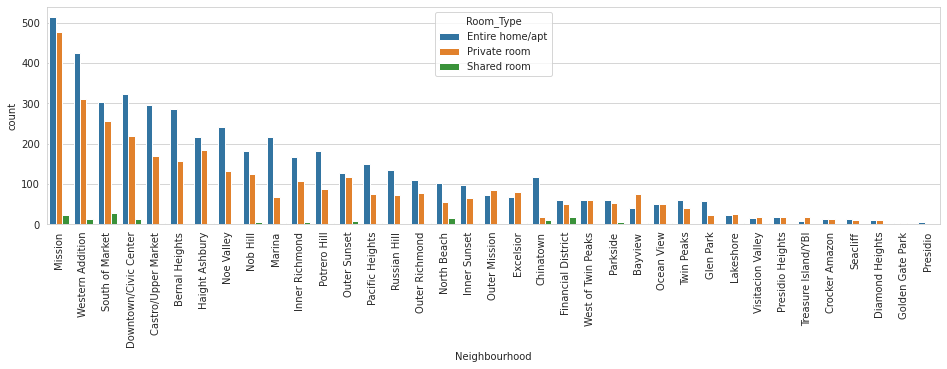

In [ ]:
# Neighborhood & Room type

from seaborn import countplot

sns.set_style('whitegrid', {'axes.linewidth': 0.5}) # only: white, dark, whitegrid, darkgrid, ticks
plt.figure(figsize=(16,4))

chart = sns.countplot(x ='Neighbourhood',  data = df, hue='Room_Type', order= df['Neighbourhood'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
